# Loan Approbal Prediction


## The goal

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

If I will manage to find a succesful solution I will be able to decline the cost of customer service and speed up the loan application process.

## Importing libraries

In [1]:
# Obsługa środowisk Python 2 i Python 3
from __future__ import division, print_function, unicode_literals

# Importowanie popularnych modułów
import numpy as np
import os
import pandas as pd

# W celu zachowania powtarzalności wyników w kolejnych przebiegach
np.random.seed(42)

# Generowanie ładnych wykresów
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Lokacja, w której będą zapisywane rysunki
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "pierwszy_projekt"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "rysunki")


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Zapisywanie rysunku", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Loading  data for analysis

In [2]:
train_dataset = pd.read_csv("train.csv")

In [3]:
train_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train_dataset["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [6]:
train_dataset["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [7]:
train_dataset["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [8]:
train_dataset["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [9]:
train_dataset["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
train_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


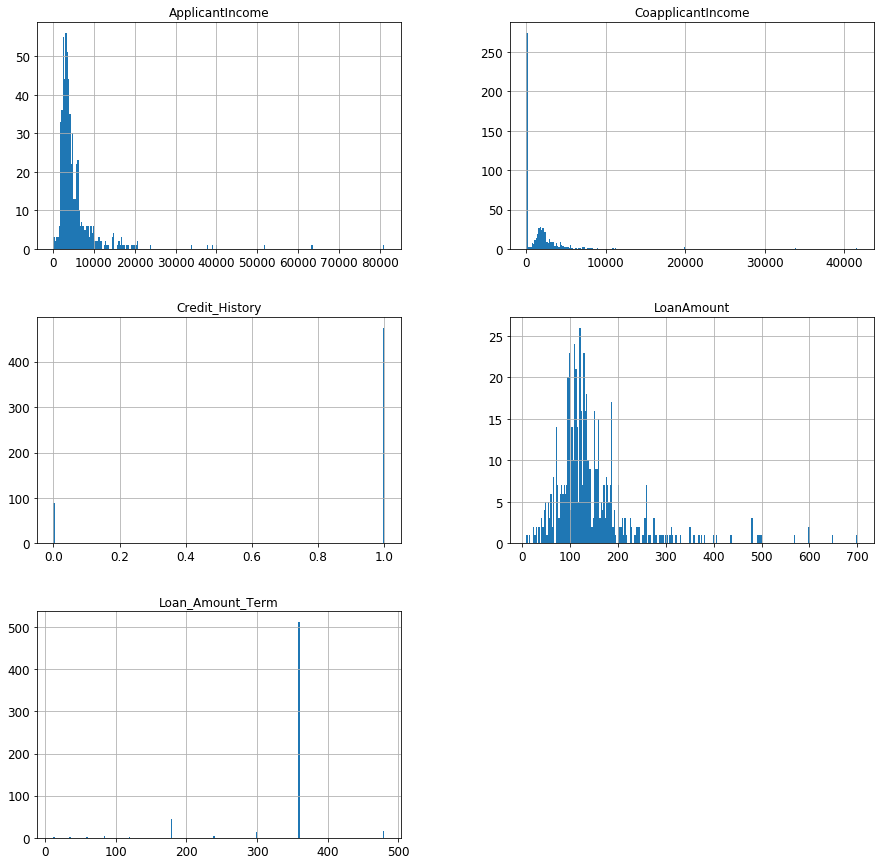

In [11]:
train_dataset.hist(bins=250, figsize=(15,15))
plt.show()

In [12]:
applicants = train_dataset.copy()

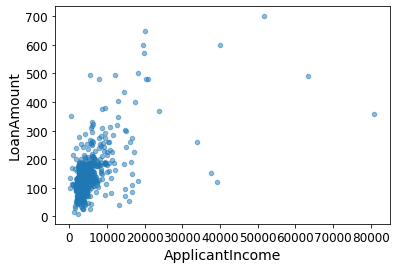

In [13]:
applicants.plot(kind='scatter', x="ApplicantIncome", y="LoanAmount", alpha = 0.5)

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
application_result = applicants["Loan_Status"]
applicants_encoded = encoder.fit_transform(application_result)
applicants

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
del applicants["Loan_Status"]

In [16]:
applicants.insert(12, "Loan_Status_2", applicants_encoded)
applicants

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_2
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [17]:
applicants["ApplicantIncome"] =  applicants["ApplicantIncome"]/10000
applicants["CoapplicantIncome"] = applicants["CoapplicantIncome"]/10000
applicants["TotalIncome"] = applicants["ApplicantIncome"]+applicants["CoapplicantIncome"]
applicants

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_2,TotalIncome
0,LP001002,Male,No,0,Graduate,No,0.5849,0.0000,NaN,360.0,1.0,Urban,1,0.5849
1,LP001003,Male,Yes,1,Graduate,No,0.4583,0.1508,128.0,360.0,1.0,Rural,0,0.6091
2,LP001005,Male,Yes,0,Graduate,Yes,0.3000,0.0000,66.0,360.0,1.0,Urban,1,0.3000
3,LP001006,Male,Yes,0,Not Graduate,No,0.2583,0.2358,120.0,360.0,1.0,Urban,1,0.4941
4,LP001008,Male,No,0,Graduate,No,0.6000,0.0000,141.0,360.0,1.0,Urban,1,0.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,0.2900,0.0000,71.0,360.0,1.0,Rural,1,0.2900
610,LP002979,Male,Yes,3+,Graduate,No,0.4106,0.0000,40.0,180.0,1.0,Rural,1,0.4106
611,LP002983,Male,Yes,1,Graduate,No,0.8072,0.0240,253.0,360.0,1.0,Urban,1,0.8312
612,LP002984,Male,Yes,2,Graduate,No,0.7583,0.0000,187.0,360.0,1.0,Urban,1,0.7583


## Poszukiwanie korelacji

In [18]:
corr_matrix = applicants.corr()
corr_matrix["Loan_Status_2"].sort_values(ascending=False)

Loan_Status_2        1.000000
Credit_History       0.561678
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.021268
TotalIncome         -0.031271
LoanAmount          -0.037318
CoapplicantIncome   -0.059187
Name: Loan_Status_2, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D9F5B48>,
      dtype=object)

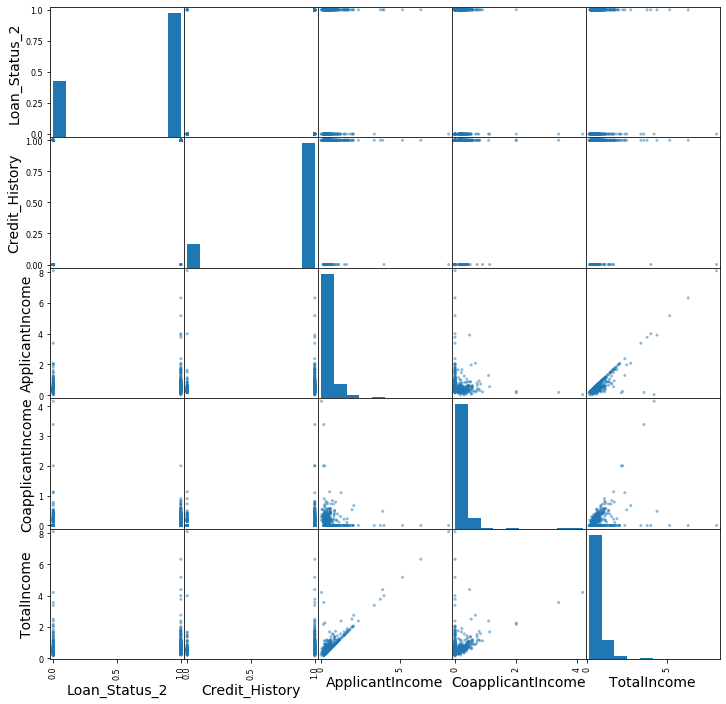

In [21]:
from pandas.plotting import scatter_matrix

attributes = ["Loan_Status_2", "Credit_History", "ApplicantIncome", "CoapplicantIncome", "TotalIncome"]
scatter_matrix(applicants[attributes], figsize=(12,12))